In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the csv which contains Bollinger Upper and Lower Values
df = pd.read_csv('ADANI_ANALYSIS.csv')

df.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Bol_Upper,Bol_Lower,Mov_Avg_14
0,2017-05-15,ADANIPOWER,EQ,30.25,30.40,30.50,30.10,30.35,30.25,30.28,2666848,8.074250e+07,4292,861729,32.31,NaN,NaN,NaN
1,2017-05-16,ADANIPOWER,EQ,30.25,30.35,33.65,30.35,32.80,32.85,32.59,39322702,1.281594e+09,57037,5217922,13.27,NaN,NaN,NaN
2,2017-05-17,ADANIPOWER,EQ,32.85,32.95,33.75,32.45,33.00,33.10,33.13,27368209,9.067376e+08,38034,3760475,13.74,NaN,NaN,NaN
3,2017-05-18,ADANIPOWER,EQ,33.10,32.80,32.85,31.70,31.90,31.90,32.37,9833756,3.182696e+08,15013,2046350,20.81,NaN,NaN,NaN
4,2017-05-19,ADANIPOWER,EQ,31.90,33.25,33.25,32.00,32.45,32.40,32.55,12551755,4.085741e+08,20421,2456282,19.57,NaN,NaN,NaN


In [43]:
# 4.1 Creating the Call column and assigning values according the bollinger bands
df['Call'] = ' '

for i in range(len(df['Close Price'])):
    if np.isnan(df.at[i,'Bol_Upper']):
        df.at[i,'Bol_Upper'] = 0
        df.at[i,'Bol_Lower'] = 0
        df.at[i,'Mov_Avg_14'] = 0
    elif df.at[i,'Close Price'] < df.at[i,'Bol_Lower']:
        df.at[i,'Call'] = 'Buy'
    elif (df.at[i,'Close Price'] < df.at[i,'Mov_Avg_14']) and (df.at[i,'Close Price'] >= df.at[i,'Bol_Lower']):
        df.at[i,'Call'] = 'Hold Buy/ Liquidate Short'
    elif (df.at[i,'Close Price'] < df.at[i,'Bol_Upper']) and (df.at[i,'Close Price'] >= df.at[i,'Mov_Avg_14']):
        df.at[i,'Call'] = 'Hold Short/ Liquidate Buy'
    elif (df.at[i,'Close Price'] >= df.at[i,'Bol_Upper']):
        df.at[i,'Call'] = 'Short'

df.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Bol_Upper,Bol_Lower,Mov_Avg_14,Call
0,2017-05-15,ADANIPOWER,EQ,30.25,30.40,30.50,30.10,30.35,30.25,30.28,2666848,8.074250e+07,4292,861729,32.31,0.0,0.0,0.0,
1,2017-05-16,ADANIPOWER,EQ,30.25,30.35,33.65,30.35,32.80,32.85,32.59,39322702,1.281594e+09,57037,5217922,13.27,0.0,0.0,0.0,
2,2017-05-17,ADANIPOWER,EQ,32.85,32.95,33.75,32.45,33.00,33.10,33.13,27368209,9.067376e+08,38034,3760475,13.74,0.0,0.0,0.0,
3,2017-05-18,ADANIPOWER,EQ,33.10,32.80,32.85,31.70,31.90,31.90,32.37,9833756,3.182696e+08,15013,2046350,20.81,0.0,0.0,0.0,
4,2017-05-19,ADANIPOWER,EQ,31.90,33.25,33.25,32.00,32.45,32.40,32.55,12551755,4.085741e+08,20421,2456282,19.57,0.0,0.0,0.0,


In [44]:
# Implementing Decision Tree Classification on Bollinger Bands and Call column as target

# Creating Independent and Dependent Variables
X = df.iloc[:,[8,15,16,17]].values
y = df.iloc[:,18].values

# Splitting the data intro training and testing data
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
# Importing the Decision Tree Class
from sklearn.tree import DecisionTreeClassifier

# Creating an object of the class
clasfr = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Fitting the model to training data
clasfr.fit(X_train, y_train)

# Predicting the test values and checking the accuracy
y_pred = clasfr.predict(X_test)

# Creating Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
acc_DT = accuracy_score(y_test,y_pred)
print('Confusion Matrix for Decision Tree Classification')
print(cm)

Confusion Matrix for Decision Tree Classification
[[ 3  0  0  0  0]
 [ 0  0  4  0  0]
 [ 0  1 40  3  0]
 [ 0  0  5 31  2]
 [ 0  0  0  7  3]]


In [46]:
# Implementing Logistic Regression Classification
# Importing the Logistic Regression class
from sklearn.linear_model import LogisticRegression

LR_clasfr = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 100)

# Fitting the model to the training model
LR_clasfr.fit(X_train,y_train)
# Predicting the test values
y_pred = LR_clasfr.predict(X_test)

# Creating confusion matrix
cm = confusion_matrix(y_test,y_pred)
acc_LR = accuracy_score(y_test,y_pred)
print('Confusion Matrix for Logistic Regression Classification')
print(cm)

Confusion Matrix for Logistic Regression Classification
[[ 3  0  0  0  0]
 [ 0  1  3  0  0]
 [ 0  0 44  0  0]
 [ 0  0  1 37  0]
 [ 0  0  0  0 10]]


/home/akshatchauhan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [47]:
# Implementing K - Nearest Neighbours Classification
# Importing the KNN class
from sklearn.neighbors import KNeighborsClassifier

KNN_clasfr = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fitting the model to the training model
KNN_clasfr.fit(X_train,y_train)
# Predicting the test values
y_pred = KNN_clasfr.predict(X_test)

# Creating confusion matrix
cm = confusion_matrix(y_test,y_pred)
acc_KNN = accuracy_score(y_test,y_pred)
print('Confusion Matrix for KNN Classification')
print(cm)

Confusion Matrix for KNN Classification
[[ 3  0  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0 41  3  0]
 [ 0  0  3 35  0]
 [ 0  0  0  7  3]]


In [48]:
# Implementing Support Vector Machine Classification
# Importing the SVM class
from sklearn.svm import SVC

SVM_clasfr = SVC(kernel = 'poly' , degree = 5, random_state = 0, gamma = 'scale')

# Fitting the model to the training model
SVM_clasfr.fit(X_train,y_train)
# Predicting the test values
y_pred = SVM_clasfr.predict(X_test)

# Creating confusion matrix
cm = confusion_matrix(y_test,y_pred)
acc_SVM = accuracy_score(y_test,y_pred)
print('Confusion Matrix for SVM Classification')
print(cm)

Confusion Matrix for SVM Classification
[[ 3  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0 44  0  0]
 [ 0  0  1 37  0]
 [ 0  0  0  0 10]]


In [49]:
# Implementing Naive Bayes Classification
# Importing the Naive Bayes class
from sklearn.naive_bayes import GaussianNB

NB_clasfr = GaussianNB()

# Fitting the model to the training model
NB_clasfr.fit(X_train,y_train)
# Predicting the test values
y_pred = NB_clasfr.predict(X_test)

# Creating confusion matrix
cm = confusion_matrix(y_test,y_pred)
acc_NB = accuracy_score(y_test,y_pred)
print('Confusion Matrix for Naive Bayes Classification')
print(cm)

Confusion Matrix for Naive Bayes Classification
[[ 3  0  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0 35  9  0]
 [ 0  0 21 17  0]
 [ 0  0  1  9  0]]


In [50]:
# Implementing Random Forest Classification
# Importing the Random Forest class
from sklearn.ensemble import RandomForestClassifier

RF_clasfr = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)

# Fitting the model to the training model
RF_clasfr.fit(X_train,y_train)
# Predicting the test values
y_pred = RF_clasfr.predict(X_test)

# Creating confusion matrix
cm = confusion_matrix(y_test,y_pred)
acc_RF = accuracy_score(y_test,y_pred)
print('Confusion Matrix for Random Forest Classification')
print(cm)

Confusion Matrix for Random Forest Classification
[[ 3  0  0  0  0]
 [ 0  0  4  0  0]
 [ 0  1 41  2  0]
 [ 0  0  4 34  0]
 [ 0  0  0  6  4]]


In [11]:
print('Accuracy of each Classification Model:\n')
print('Logistic Regression      : ' + str(round(acc_LR*100,3)) + str('%'))
print('K-Nearest Neighbors      : ' + str(round(acc_KNN*100,3)) + str('%'))
print('Support Vector Machine   : ' + str(round(acc_SVM*100,3)) + str('%'))
print('Naive Bayes Classifier   : ' + str(round(acc_NB*100,3)) + str('%'))
print('Decision Tree Classifier : ' + str(round(acc_DT*100,3)) + str('%'))
print('Random Forest Classifier : ' + str(round(acc_RF*100,3)) + str('%'))

Accuracy of each Classification Model:

Logistic Regression      : 95.96%
K-Nearest Neighbors      : 82.828%
Support Vector Machine   : 98.99%
Naive Bayes Classifier   : 55.556%
Decision Tree Classifier : 77.778%
Random Forest Classifier : 82.828%


In [51]:
# Importing stock data of Maruti Suzuki
df2 = pd.read_csv('Large_Cap/MARUTI.csv')
df2.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MARUTI,EQ,15-May-2017,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01
1,MARUTI,EQ,16-May-2017,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97
2,MARUTI,EQ,17-May-2017,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37
3,MARUTI,EQ,18-May-2017,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44
4,MARUTI,EQ,19-May-2017,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49


In [52]:
# Adding the Bollinger Columns ( Bol_Upper, Bol_Lower, Moving Average )
Mov_Avg_14 = df2['Close Price'].rolling(window = 14).mean()
Standard_Deviation_14 = df2['Close Price'].rolling(window = 14).std()
Bol_Upper = Mov_Avg_14 + Standard_Deviation_14*2
Bol_Lower = Mov_Avg_14 - Standard_Deviation_14*2

# Adding the columns to the dataframe
df2['Bol_Upper'] = Bol_Upper
df2['Bol_Lower'] = Bol_Lower
df2['Mov_Avg_14'] = Mov_Avg_14

# Replacing the nan values with 0
for i in range(13):
    if np.isnan(df2.at[i,'Bol_Upper']):
        df2.at[i,'Bol_Upper'] = 0
        df2.at[i,'Bol_Lower'] = 0
        df2.at[i,'Mov_Avg_14'] = 0
df2.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Bol_Upper,Bol_Lower,Mov_Avg_14
0,MARUTI,EQ,15-May-2017,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01,0.0,0.0,0.0
1,MARUTI,EQ,16-May-2017,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97,0.0,0.0,0.0
2,MARUTI,EQ,17-May-2017,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37,0.0,0.0,0.0
3,MARUTI,EQ,18-May-2017,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44,0.0,0.0,0.0
4,MARUTI,EQ,19-May-2017,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,0.0,0.0,0.0


In [53]:
# Using SVM Classification model to predict the Call for each day
df2['Call'] = SVM_clasfr.predict(df2.iloc[:,[8,15,16,17]].values)

In [54]:
# Maruti Stock Calls for each day
df2[['Close Price','Bol_Upper','Bol_Lower','Mov_Avg_14','Call']]

,Close Price,Bol_Upper,Bol_Lower,Mov_Avg_14,Call
0,6823.90,0.000000,0.000000,0.000000,
1,6953.95,0.000000,0.000000,0.000000,
2,6958.20,0.000000,0.000000,0.000000,
3,6831.05,0.000000,0.000000,0.000000,
4,6790.55,0.000000,0.000000,0.000000,
...,...,...,...,...,...
491,6702.00,7636.878670,6392.778472,7014.828571,Hold Buy/ Liquidate Short
492,6650.15,7585.199648,6345.500352,6965.350000,Hold Buy/ Liquidate Short
493,6624.95,7515.141609,6311.622677,6913.382143,Hold Buy/ Liquidate Short
494,6631.60,7383.528216,6325.100356,6854.314286,Hold Buy/ Liquidate Short


In [149]:
# 4.2 
# Importing stock data of Asian Paint from Large Cap
df3 = pd.read_csv('Large_Cap/ASIANPAINT.csv')
df3.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ASIANPAINT,EQ,15-May-2017,1132.95,1142.90,1149.9,1135.00,1149.90,1148.05,1145.57,729473,8.356654e+08,20868,471377,64.62
1,ASIANPAINT,EQ,16-May-2017,1148.05,1148.90,1149.7,1129.60,1143.50,1142.85,1137.20,913600,1.038946e+09,35436,641893,70.26
2,ASIANPAINT,EQ,17-May-2017,1142.85,1143.00,1159.0,1136.55,1156.75,1154.95,1149.76,579709,6.665239e+08,24824,282528,48.74
3,ASIANPAINT,EQ,18-May-2017,1154.95,1147.15,1159.8,1140.00,1154.80,1151.35,1149.89,702003,8.072265e+08,23468,436095,62.12
4,ASIANPAINT,EQ,19-May-2017,1151.35,1139.85,1144.8,1098.80,1131.00,1123.15,1124.84,1732673,1.948986e+09,87720,1021656,58.96


In [150]:
# A function that calculates percentage change between two columns
def percentChange(a,b):
    res = []
    for i in range(len(a)):
        res.append( ((b[i]-a[i])/a[i])*100 )
    return res

In [151]:
# Creating 4 columns
# Calculating the percentage change between Open Price and Close Price for each day
df3['OC_pct'] = percentChange(df3['Open Price'],df3['Close Price'])

# Calculating the percentage change between High Price and Low Price for each day
df3['LH_pct'] = percentChange(df3['Low Price'],df3['High Price'])

In [152]:
# Calculating 5 day rolling mean and standard deviation
df3['Mov_Avg_5'] = df3['Close Price'].rolling(window = 5).mean()
df3['Std_5'] = df3['Close Price'].rolling(window = 5).std()

In [153]:
# Replacing the NaN values to zero
for i in range(4):
    df3.at[i,'Mov_Avg_5'] = 0
    df3.at[i,'Std_5'] = 0
df3.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,OC_pct,LH_pct,Mov_Avg_5,Std_5
0,ASIANPAINT,EQ,15-May-2017,1132.95,1142.90,1149.9,1135.00,1149.90,1148.05,1145.57,729473,8.356654e+08,20868,471377,64.62,0.450608,1.312775,0.00,0.000000
1,ASIANPAINT,EQ,16-May-2017,1148.05,1148.90,1149.7,1129.60,1143.50,1142.85,1137.20,913600,1.038946e+09,35436,641893,70.26,-0.526591,1.779391,0.00,0.000000
2,ASIANPAINT,EQ,17-May-2017,1142.85,1143.00,1159.0,1136.55,1156.75,1154.95,1149.76,579709,6.665239e+08,24824,282528,48.74,1.045494,1.975276,0.00,0.000000
3,ASIANPAINT,EQ,18-May-2017,1154.95,1147.15,1159.8,1140.00,1154.80,1151.35,1149.89,702003,8.072265e+08,23468,436095,62.12,0.366125,1.736842,0.00,0.000000
4,ASIANPAINT,EQ,19-May-2017,1151.35,1139.85,1144.8,1098.80,1131.00,1123.15,1124.84,1732673,1.948986e+09,87720,1021656,58.96,-1.465105,4.186385,1144.07,12.513473


In [154]:
# Creating a new column 'Action' by applying the specified criteria
df3['Action'] = 0
for i in range(len(df3['Close Price'])-1):
    if df3.at[i,'Close Price'] < df3.at[i+1,'Close Price']:
        df3.at[i,'Action'] = 1
    elif df3.at[i,'Close Price'] > df3.at[i+1,'Close Price']:
        df3.at[i,'Action'] = -1

In [155]:
df3.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,OC_pct,LH_pct,Mov_Avg_5,Std_5,Action
0,ASIANPAINT,EQ,15-May-2017,1132.95,1142.90,1149.9,1135.00,1149.90,1148.05,1145.57,729473,8.356654e+08,20868,471377,64.62,0.450608,1.312775,0.00,0.000000,-1
1,ASIANPAINT,EQ,16-May-2017,1148.05,1148.90,1149.7,1129.60,1143.50,1142.85,1137.20,913600,1.038946e+09,35436,641893,70.26,-0.526591,1.779391,0.00,0.000000,1
2,ASIANPAINT,EQ,17-May-2017,1142.85,1143.00,1159.0,1136.55,1156.75,1154.95,1149.76,579709,6.665239e+08,24824,282528,48.74,1.045494,1.975276,0.00,0.000000,-1
3,ASIANPAINT,EQ,18-May-2017,1154.95,1147.15,1159.8,1140.00,1154.80,1151.35,1149.89,702003,8.072265e+08,23468,436095,62.12,0.366125,1.736842,0.00,0.000000,-1
4,ASIANPAINT,EQ,19-May-2017,1151.35,1139.85,1144.8,1098.80,1131.00,1123.15,1124.84,1732673,1.948986e+09,87720,1021656,58.96,-1.465105,4.186385,1144.07,12.513473,-1


In [156]:
# Independent variables
X = df3.iloc[:,15:19].values
# Dependent Variable
y = df3.iloc[:,19].values

# Splitting the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [157]:
# Creating a Random Forest Classifier with inputs as the 4 columns and 'Action' as the target

RF_clasfr2 = RandomForestClassifier(n_estimators = 110, criterion='gini', random_state = 0)

# Fitting the training data to the model
RF_clasfr2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [158]:
# Predicting the test results
y_pred = RF_clasfr2.predict(X_test)

In [159]:
# Calculating the accuracy
RF_acc = accuracy_score(y_test, y_pred)

print('Accuracy of Random Forest Model: '+str(round(RF_acc*100,3))+' %')

Accuracy of Random Forest Model: 54.545 %


In [179]:
# Creating a column for net cumulative returns
df3['Net_Cum_Return'] = 0

origin_price = df3.at[0,'Close Price']

for i in range(len(df3['Close Price'])):
    df3.loc[i,'Net_Cum_Return'] = ((df3.at[i,'Close Price'] - origin_price)/origin_price)

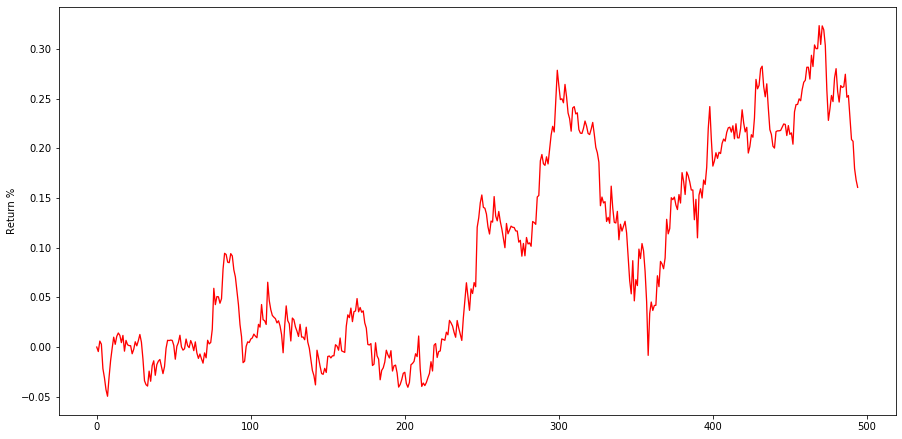

In [187]:
plt.rcParams["figure.figsize"]=15,7.5
plt.plot(df3['Net_Cum_Return'],'red',linewidth = 1.3)
plt.ylabel('Return %')
plt.show()